In [1]:
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures   
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error, root_mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore", category=ImportWarning)

In [2]:
df = pd.read_csv("exams.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [3]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


<Axes: xlabel='gender', ylabel='math score'>

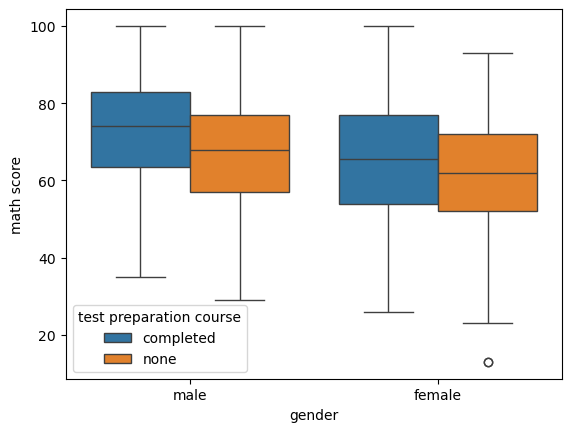

In [4]:
sns.boxplot(data =df, x = 'gender', y ='math score', hue='test preparation course')

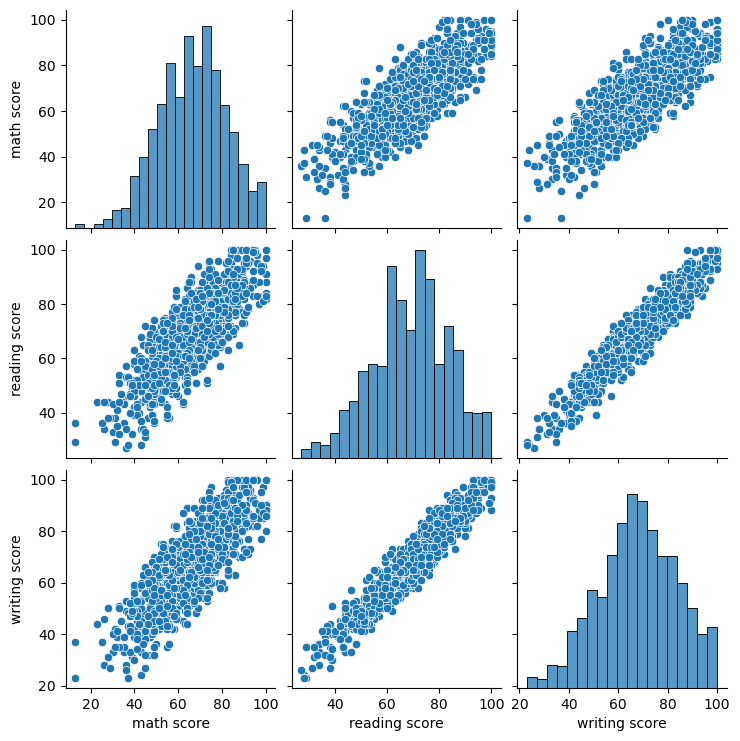

In [5]:
sns.pairplot(data = df)

<Axes: >

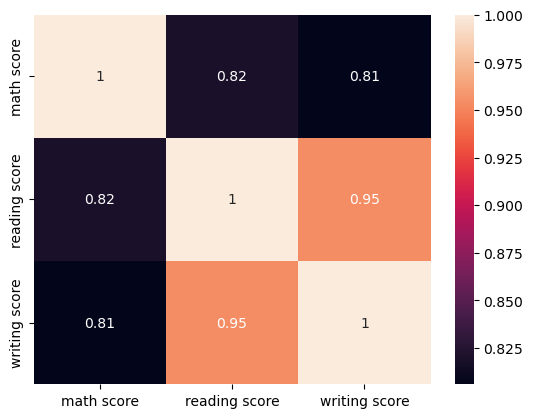

In [6]:
sns.heatmap(data = df.corr(numeric_only=True), annot = True)

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<Axes: xlabel='math score', ylabel='reading score'>

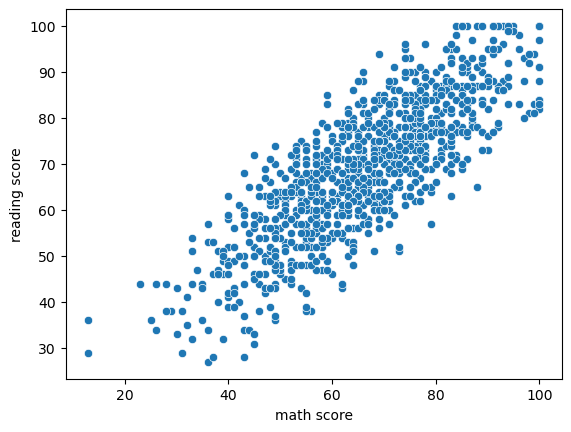

In [8]:
sns.scatterplot(data = df, x ='math score', y= 'reading score')

In [9]:
df['gender']

0        male
1      female
2        male
3        male
4        male
        ...  
995      male
996      male
997    female
998    female
999      male
Name: gender, Length: 1000, dtype: object

In [10]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['parental level of education']

0             high school
1        some high school
2            some college
3             high school
4      associate's degree
              ...        
995           high school
996    associate's degree
997      some high school
998          some college
999          some college
Name: parental level of education, Length: 1000, dtype: object

In [11]:
df['parental level of education'].value_counts()
education_mapping = {
    "some high school": 1,
    "high school": 2,
    "some college": 3,
    "associate's degree":4,
    "bachelor's degree": 5,
    "master's degree": 6
}
df['parental level of education'] = df['parental level of education'].replace(education_mapping)

C:\Users\ansar\AppData\Local\Temp\ipykernel_13564\1625467744.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['parental level of education'] = df['parental level of education'].replace(education_mapping)


<Axes: xlabel='parental level of education', ylabel='math score'>

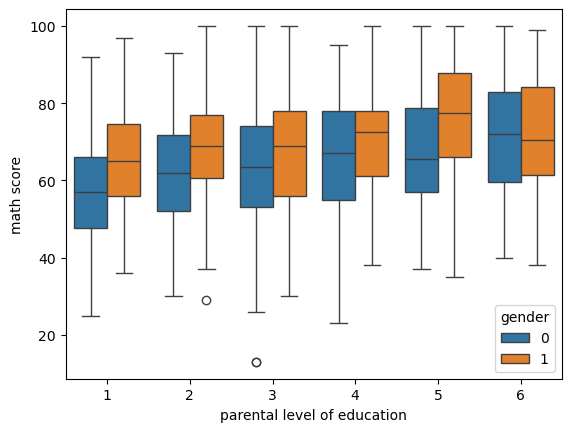

In [12]:
sns.boxplot(data = df, x = 'parental level of education', y = 'math score', hue='gender')

<Axes: >

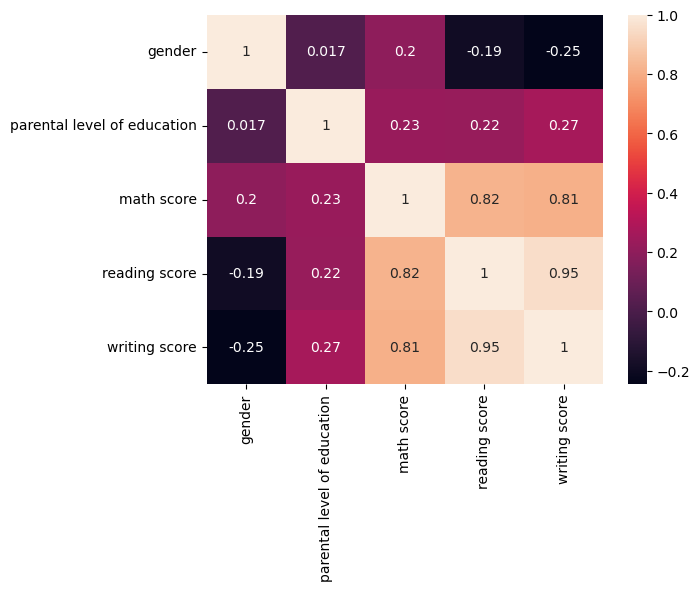

In [13]:
sns.heatmap(data = df.corr(numeric_only=True), annot = True)

In [14]:
my_obj_df = df.select_dtypes(include='object')
my_num_df = df.select_dtypes(exclude='object')

In [15]:
df_object_dum = pd.get_dummies(my_obj_df, drop_first=True,dtype='int64')
df_object_dum

,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard,test preparation course_none
0,0,0,0,0,1,0
1,0,0,1,0,0,1
2,0,0,0,1,0,1
3,1,0,0,0,1,1
4,0,0,0,1,1,0
...,...,...,...,...,...,...
995,0,1,0,0,1,1
996,0,0,1,0,0,0
997,0,1,0,0,0,1
998,0,1,0,0,1,1


In [16]:
final_df = pd.concat([my_num_df,df_object_dum], axis = 1)

In [17]:
final_df.astype(int)

,gender,parental level of education,math score,reading score,writing score,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard,test preparation course_none
0,1,2,67,67,63,0,0,0,0,1,0
1,0,1,40,59,55,0,0,1,0,0,1
2,1,3,59,60,50,0,0,0,1,0,1
3,1,2,77,78,68,1,0,0,0,1,1
4,1,4,78,73,68,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,2,73,70,65,0,1,0,0,1,1
996,1,4,85,91,92,0,0,1,0,0,0
997,0,1,32,35,41,0,1,0,0,0,1
998,0,3,73,74,82,0,1,0,0,1,1


In [18]:
X = final_df.drop('math score', axis=1)
y = final_df['math score']

In [19]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [20]:
model.fit(X_train,y_train)

LinearRegression()

In [21]:
test_prediction = model.predict(X_test)

In [22]:
test_prediction

array([ 76.30741945,  59.97378593,  38.82926194,  67.64387157,
        59.17075917,  44.85350368,  32.30078451,  62.02328139,
        76.45185447,  91.51572757,  74.03501496,  48.75883786,
        77.51914399,  53.03776926,  67.72549323,  85.80510697,
        75.99155736,  48.82200652,  41.05195702,  71.17630188,
        60.09353022,  54.7190528 ,  68.8562968 ,  86.90738127,
        64.04440465,  77.40508928,  61.48748735,  70.93790039,
        53.3653402 ,  45.65494437,  64.12947973,  60.23801765,
        73.82474897,  84.90341296,  75.47887533,  62.50673711,
        74.05846996,  52.33888704,  57.50101238,  65.8903887 ,
        59.17005848,  62.53037158,  73.43578218,  65.62614387,
        73.97758345,  56.17304747,  31.96490723,  64.54027823,
        72.92828503,  79.06810853,  68.91139564,  79.22863914,
        58.72300084,  68.4343818 ,  91.45534527,  51.33857158,
        44.04601351,  31.07245429,  51.58018397,  74.25031918,
        78.58085952,  72.09466177,  68.43817434,  46.84

In [23]:
mean_absolute_error(y_test, test_prediction)

4.575745821967902

In [24]:
mean_squared_error(y_test, test_prediction)

32.27646444646366

In [25]:
root_mean_squared_error(y_test, test_prediction)

5.681237932569244

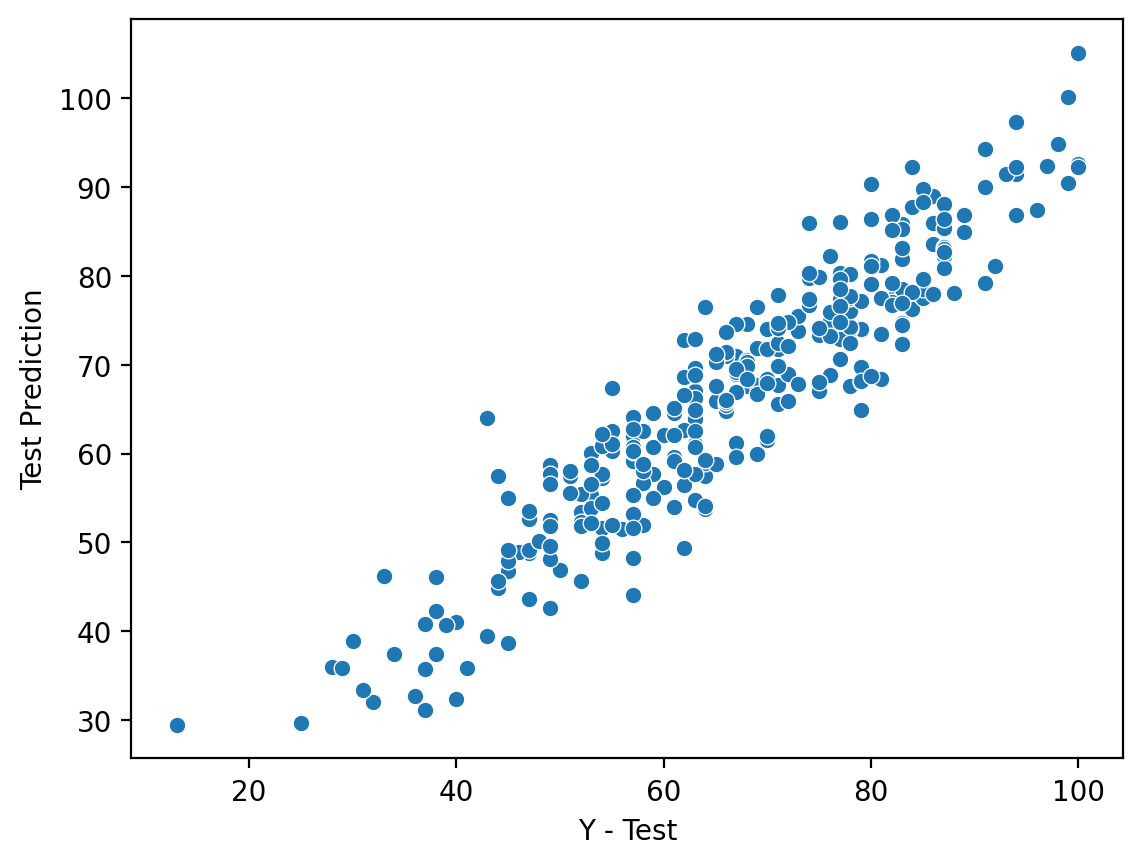

In [26]:
plt.figure(dpi = 200)
sns.scatterplot(x = y_test, y = test_prediction)
plt.xlabel('Y - Test')
plt.ylabel('Test Prediction')
plt.show()

In [27]:
# Polynomial Regression
poly_model = PolynomialFeatures(degree = 2, include_bias=False)

In [28]:
poly_model.fit(X)

PolynomialFeatures(include_bias=False)

In [29]:
poly_features = poly_model.transform(X)

In [30]:
poly_model.fit_transform(X)

array([[ 1.,  2., 67., ...,  1.,  0.,  0.],
       [ 0.,  1., 59., ...,  0.,  0.,  1.],
       [ 1.,  3., 60., ...,  0.,  0.,  1.],
       ...,
       [ 0.,  1., 35., ...,  0.,  0.,  1.],
       [ 0.,  3., 74., ...,  1.,  1.,  1.],
       [ 1.,  3., 60., ...,  1.,  0.,  0.]])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state =101)

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train, y_train)

LinearRegression()

In [34]:
test_predictions = model.predict(X_test)

In [35]:
test_predictions

array([ 76.11828037,  61.06716342,  41.06675525,  65.11315723,
        59.55811359,  47.98048587,  30.04718498,  62.23798175,
        77.91290603,  93.01399417,  73.62684818,  49.90134365,
        77.99699037,  53.19522662,  66.44923559,  86.81948276,
        75.64893138,  50.02032275,  38.83607288,  70.84913253,
        60.78368136,  56.4780788 ,  69.72459113,  87.39978955,
        62.7641864 ,  76.92653079,  62.00905146,  72.02421259,
        54.7064342 ,  45.37698494,  63.73549918,  59.7301807 ,
        73.23417087,  86.30808838,  76.22945972,  62.71419711,
        74.32205828,  54.62123294,  57.6051311 ,  65.94626422,
        59.24142335,  64.63871951,  74.02843365,  66.82034233,
        74.82190128,  55.43401412,  33.64508328,  64.515871  ,
        71.98879748,  79.05401798,  67.25611042,  80.09431262,
        57.08507871,  70.20419879,  92.50749011,  49.868334  ,
        44.05030042,  35.02694507,  51.00095308,  71.50266071,
        78.92359158,  68.83717914,  68.03943486,  47.66

In [36]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)

In [37]:
MAE

4.707978568970204

In [38]:
MSE

34.1537759869743

In [39]:
RMSE

5.8441232008723345

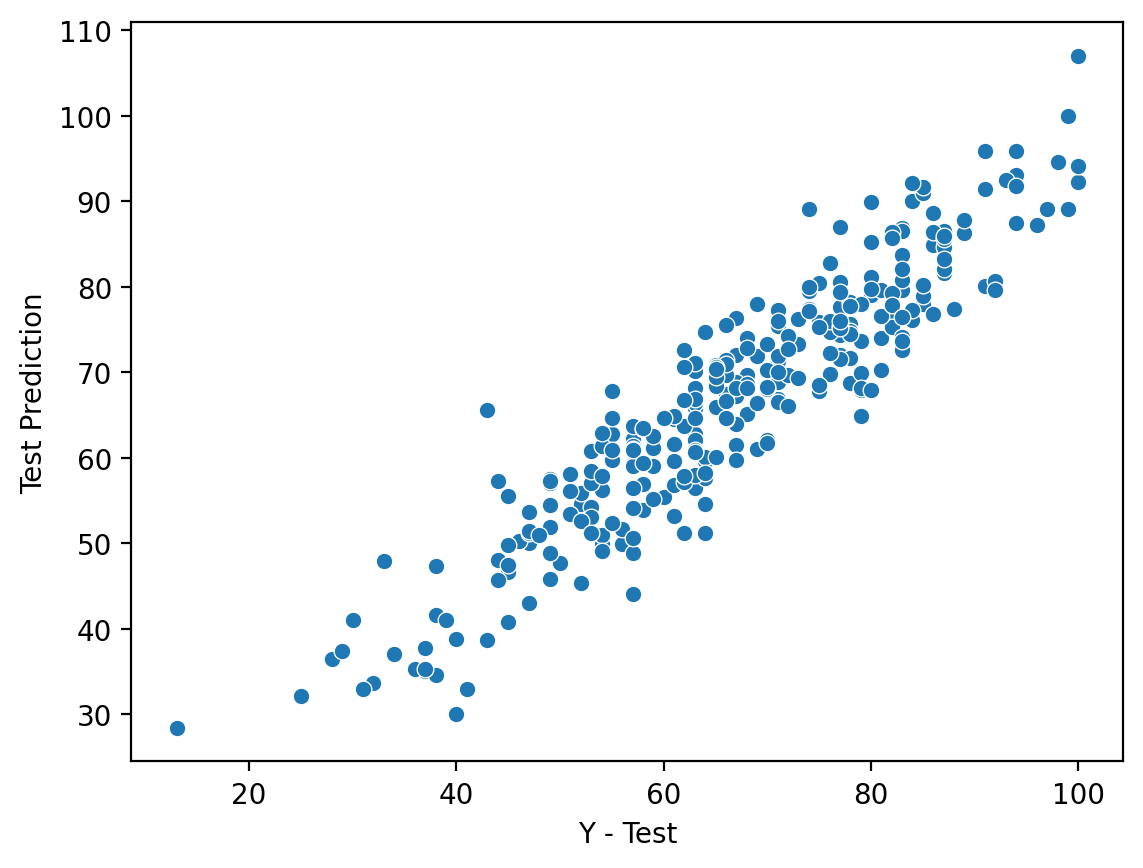

In [40]:
plt.figure(dpi = 200)
sns.scatterplot(x = y_test, y = test_predictions)
plt.xlabel('Y - Test')
plt.ylabel('Test Prediction')
plt.show()

In [41]:
scaler = StandardScaler()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [43]:
scaler.fit(X_train)

StandardScaler()

In [44]:
scaled_X_train = scaler.fit_transform(X_train)

In [45]:
scaled_X_test = scaler.transform(X_test)

In [46]:
elastic_model = ElasticNet()

In [47]:
param_grid = {
    'alpha':[0.1,1,2,10,50,100], 'l1_ratio':[.1,.4,.5,.7,.9,1]
}

In [48]:
grid_model = GridSearchCV(estimator=elastic_model, param_grid = param_grid,
                         scoring= 'neg_mean_squared_error',
                         cv =5, verbose = 2)

In [49]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.4; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.4; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.4; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.4; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.4; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1,

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 2, 10, 50, 100],
                         'l1_ratio': [0.1, 0.4, 0.5, 0.7, 0.9, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [50]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1)

In [51]:
y_pred = grid_model.predict(X_test)

In [52]:
mean_absolute_error(y_test, y_pred)

4.562555188360161

In [53]:
mean_squared_error(y_test, y_pred)

32.50217590627395

In [54]:
root_mean_squared_error(y_test, y_pred)

5.701067961906256

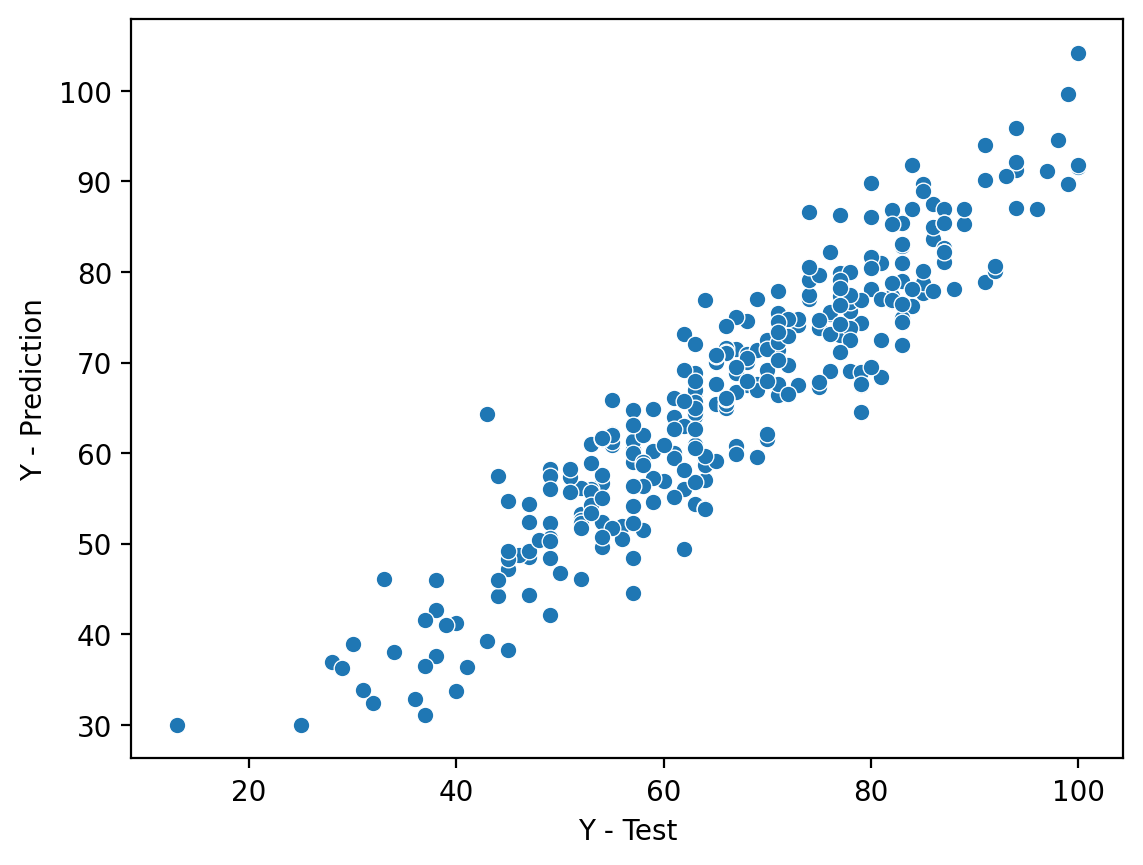

In [55]:
plt.figure(dpi = 200)
sns.scatterplot(x = y_test, y = y_pred)
plt.xlabel('Y - Test')
plt.ylabel('Y - Prediction')
plt.show()

In [58]:
data = {
    "Model": ["Linear Regression", "Polynomial Regression", "ElasticNet"],
    "MAE": [4.57, 4.707, 4.562 ], 
    "MSE": [32.276, 34.15, 32.502], 
    "R²": [5.681, 5.844 , 5.701]   
}
model_performance_df = pd.DataFrame(data)

In [59]:
model_performance_df

,Model,MAE,MSE,R²
0,Linear Regression,4.570,32.276,5.681
1,Polynomial Regression,4.707,34.150,5.844
2,ElasticNet,4.562,32.502,5.701
